Dataset Head:
   Callorie  Age  Weight  Fitness_Level      Injury Gender   Type  \
0      2500   28      65            0.8  Toe Injury      M  minor   
1      2400   31      70            0.7  Toe Injury      M  minor   
2      3300   29      67            0.8  Toe Injury      M  minor   
3      2500   30      68            0.8  Toe Injury      M  minor   
4      2400   25      55            0.7  Toe Injury      M  major   

   Recovery_Period  
0                2  
1                2  
2                2  
3                3  
4                6  
Model Performance Metrics:
Mean Absolute Error: 2.35
Root Mean Squared Error: 3.50
R-squared Score: 0.19
Approximate Accuracy: 19.19%

Feature Importance:
         Feature  Importance
6           Type    0.425231
4         Injury    0.145031
2         Weight    0.143504
1            Age    0.122455
0       Callorie    0.108738
3  Fitness_Level    0.043339
5         Gender    0.011702


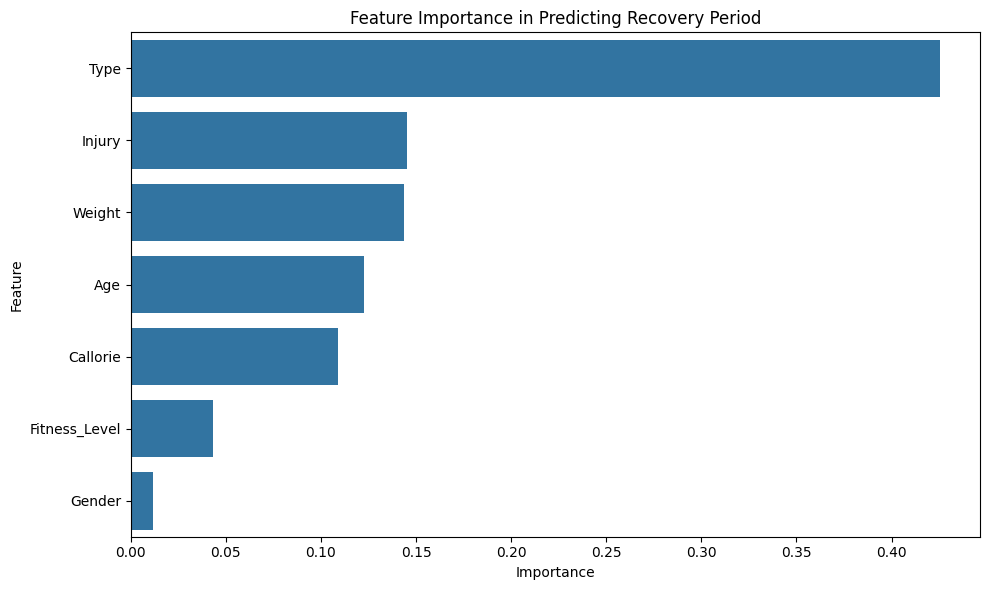

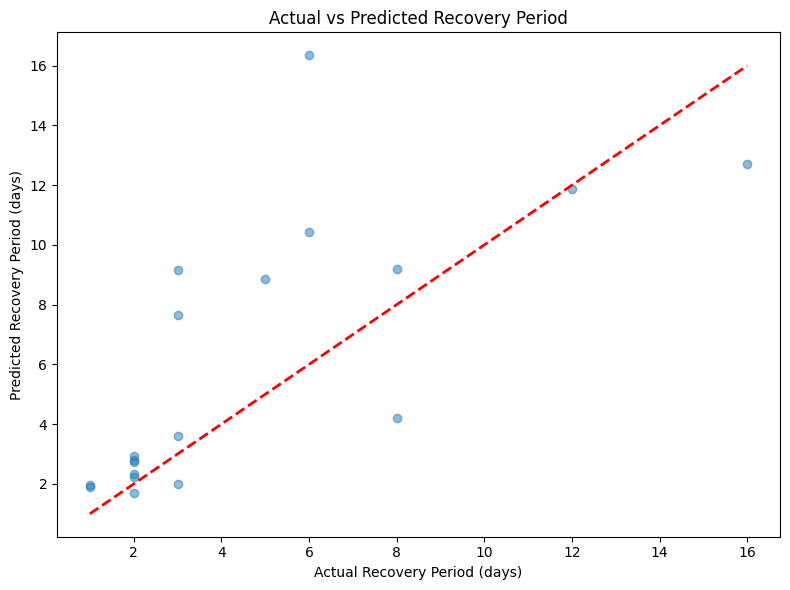

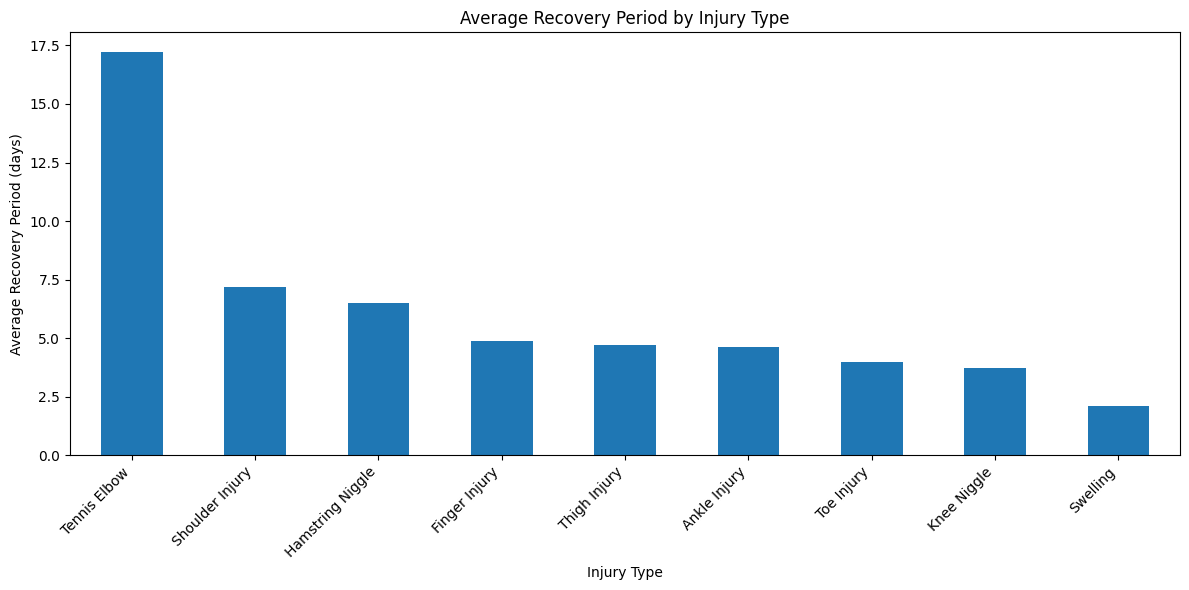

In [ ]:
#PREDICTIVE ANALYSIS OF ATHLETE INJURY RECOVERY

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('injury1.csv')
print("Dataset Head:")
print(df.head())

# Preprocess the data
label_encoders = {}
categorical_columns = ['Injury', 'Gender', 'Type']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split features and target
X = df.drop('Recovery_Period', axis=1)
y = df['Recovery_Period']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Representing R² as percentage

print(f"Model Performance Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Approximate Accuracy: {accuracy:.2f}%")

# Save the model and label encoders
joblib.dump(rf_model, 'injury_recovery_model.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Create visualizations

# 1. Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Recovery Period')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 2. Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Recovery Period (days)')
plt.ylabel('Predicted Recovery Period (days)')
plt.title('Actual vs Predicted Recovery Period')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

# 3. Recovery Period Distribution by Injury Type
plt.figure(figsize=(12, 6))
injury_map = dict(zip(range(len(label_encoders['Injury'].classes_)), label_encoders['Injury'].classes_))
df['Injury_Name'] = df['Injury'].map(injury_map)
avg_recovery = df.groupby('Injury_Name')['Recovery_Period'].mean().sort_values(ascending=False)
avg_recovery.plot(kind='bar')
plt.title('Average Recovery Period by Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Average Recovery Period (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('injury_recovery_distribution.png')
plt.show()
